In [1]:
import pandas as pd

In [2]:
dfff = pd.read_csv("../output/final_clean_data.csv")
dfff.head()

,Suburb,Rooms,Type,Price,Postcode,Bathroom,Car,Landsize,Year,Month,Day,Crime
0,abbotsford,2,h,1480000.0,3067.0,1.0,1.0,202.0,2016,2,12,1053.0
1,abbotsford,2,h,1035000.0,3067.0,1.0,0.0,156.0,2016,3,2,1053.0
2,abbotsford,4,h,1600000.0,3067.0,1.0,2.0,120.0,2016,3,6,1053.0
3,abbotsford,2,h,941000.0,3067.0,1.0,0.0,181.0,2016,6,5,1053.0
4,abbotsford,3,h,1876000.0,3067.0,2.0,0.0,245.0,2016,6,5,1053.0


In [3]:
len(dfff)

17394

In [4]:
dfff.columns

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Postcode', 'Bathroom', 'Car',
       'Landsize', 'Year', 'Month', 'Day', 'Crime'],
      dtype='object')

# THIS IS WHERE I'M SELECTING COLS FOR X VARIABLES and y

In [5]:
# dropping postcode and day 
df = dfff.iloc[:, [1,2,3,5,6,7,8,9,11]]
df

,Rooms,Type,Price,Bathroom,Car,Landsize,Year,Month,Crime
0,2,h,1480000.0,1.0,1.0,202.0,2016,2,1053.0
1,2,h,1035000.0,1.0,0.0,156.0,2016,3,1053.0
2,4,h,1600000.0,1.0,2.0,120.0,2016,3,1053.0
3,2,h,941000.0,1.0,0.0,181.0,2016,6,1053.0
4,3,h,1876000.0,2.0,0.0,245.0,2016,6,1053.0
...,...,...,...,...,...,...,...,...,...
17389,3,h,570000.0,2.0,2.0,404.0,2018,1,529.0
17390,4,h,1480000.0,1.0,3.0,593.0,2018,1,690.0
17391,2,h,888000.0,2.0,1.0,98.0,2018,1,690.0
17392,2,t,705000.0,1.0,2.0,220.0,2018,1,690.0


### Will check the min and max of each column to see if I can do scaling through sklearn

In [6]:
# Rooms

print(f"max: {df['Rooms'].max()}")
print(f"min: {df['Rooms'].min()}")

max: 12
min: 1


In [7]:
# Bathroom

print(f"max: {df['Bathroom'].max()}")
print(f"min: {df['Bathroom'].min()}")

# surely no more than 9 right??
# 0 is interesting??

max: 9.0
min: 0.0


In [8]:
# Car

print(f"max: {df['Car'].max()}")
print(f"min: {df['Car'].min()}")

max: 18.0
min: 0.0


In [9]:
# Landsize

print(f"max: {df['Landsize'].max()}")
print(f"min: {df['Landsize'].min()}")

# again 0 what??

max: 433014.0
min: 0.0


In [10]:
# Year

print(f"max: {df['Year'].max()}")
print(f"min: {df['Year'].min()}")

# will need to make max 2021

max: 2018
min: 2016


In [11]:
# Month

print(f"max: {df['Month'].max()}")
print(f"min: {df['Month'].min()}")

# 0 to 11 is perfect

max: 11
min: 0


In [12]:
# Crime Average	

print(f"max: {df['Crime'].max()}")
print(f"min: {df['Crime'].min()}")

# will need to check max crime for 2020
# becuase will be using that for input
# should I set min to 0?

#2020
#max: 14174
#min: 0

max: 15485.0
min: 1.0


## Scaling 

### Will make function for this!!!!

In [13]:
df['Rooms'] = (df['Rooms'] - 0)/(12-0)
df.head()

<ipython-input-13-385ca4dcfadf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rooms'] = (df['Rooms'] - 0)/(12-0)


,Rooms,Type,Price,Bathroom,Car,Landsize,Year,Month,Crime
0,0.166667,h,1480000.0,1.0,1.0,202.0,2016,2,1053.0
1,0.166667,h,1035000.0,1.0,0.0,156.0,2016,3,1053.0
2,0.333333,h,1600000.0,1.0,2.0,120.0,2016,3,1053.0
3,0.166667,h,941000.0,1.0,0.0,181.0,2016,6,1053.0
4,0.250000,h,1876000.0,2.0,0.0,245.0,2016,6,1053.0


In [14]:
df['Bathroom'] = (df['Bathroom'] - 0)/(9-0)
df.head()

<ipython-input-14-90f0af0dcb2a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Bathroom'] = (df['Bathroom'] - 0)/(9-0)


,Rooms,Type,Price,Bathroom,Car,Landsize,Year,Month,Crime
0,0.166667,h,1480000.0,0.111111,1.0,202.0,2016,2,1053.0
1,0.166667,h,1035000.0,0.111111,0.0,156.0,2016,3,1053.0
2,0.333333,h,1600000.0,0.111111,2.0,120.0,2016,3,1053.0
3,0.166667,h,941000.0,0.111111,0.0,181.0,2016,6,1053.0
4,0.250000,h,1876000.0,0.222222,0.0,245.0,2016,6,1053.0


In [15]:
df['Car'] = (df['Car'] - 0)/(18-0)
df.head()

<ipython-input-15-507f6027c40c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Car'] = (df['Car'] - 0)/(18-0)


,Rooms,Type,Price,Bathroom,Car,Landsize,Year,Month,Crime
0,0.166667,h,1480000.0,0.111111,0.055556,202.0,2016,2,1053.0
1,0.166667,h,1035000.0,0.111111,0.000000,156.0,2016,3,1053.0
2,0.333333,h,1600000.0,0.111111,0.111111,120.0,2016,3,1053.0
3,0.166667,h,941000.0,0.111111,0.000000,181.0,2016,6,1053.0
4,0.250000,h,1876000.0,0.222222,0.000000,245.0,2016,6,1053.0


In [16]:
df['Landsize'] = (df['Landsize'] - 0)/(433014-0)
df.head()

<ipython-input-16-a60eb1b8fd82>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Landsize'] = (df['Landsize'] - 0)/(433014-0)


,Rooms,Type,Price,Bathroom,Car,Landsize,Year,Month,Crime
0,0.166667,h,1480000.0,0.111111,0.055556,0.000466,2016,2,1053.0
1,0.166667,h,1035000.0,0.111111,0.000000,0.000360,2016,3,1053.0
2,0.333333,h,1600000.0,0.111111,0.111111,0.000277,2016,3,1053.0
3,0.166667,h,941000.0,0.111111,0.000000,0.000418,2016,6,1053.0
4,0.250000,h,1876000.0,0.222222,0.000000,0.000566,2016,6,1053.0


In [17]:
df['Year'] = (df['Year'] - 2016)/(2021-2016)
df.head()

<ipython-input-17-a7512693f0a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = (df['Year'] - 2016)/(2021-2016)


,Rooms,Type,Price,Bathroom,Car,Landsize,Year,Month,Crime
0,0.166667,h,1480000.0,0.111111,0.055556,0.000466,0.0,2,1053.0
1,0.166667,h,1035000.0,0.111111,0.000000,0.000360,0.0,3,1053.0
2,0.333333,h,1600000.0,0.111111,0.111111,0.000277,0.0,3,1053.0
3,0.166667,h,941000.0,0.111111,0.000000,0.000418,0.0,6,1053.0
4,0.250000,h,1876000.0,0.222222,0.000000,0.000566,0.0,6,1053.0


In [18]:
df['Month'] = (df['Month'] - 0)/(11-0)
df.head()

<ipython-input-18-39e3885b7afe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = (df['Month'] - 0)/(11-0)


,Rooms,Type,Price,Bathroom,Car,Landsize,Year,Month,Crime
0,0.166667,h,1480000.0,0.111111,0.055556,0.000466,0.0,0.181818,1053.0
1,0.166667,h,1035000.0,0.111111,0.000000,0.000360,0.0,0.272727,1053.0
2,0.333333,h,1600000.0,0.111111,0.111111,0.000277,0.0,0.272727,1053.0
3,0.166667,h,941000.0,0.111111,0.000000,0.000418,0.0,0.545455,1053.0
4,0.250000,h,1876000.0,0.222222,0.000000,0.000566,0.0,0.545455,1053.0


In [19]:
df['Crime'] = (df['Crime'] - 0)/(15485-0)
df.head()

<ipython-input-19-c47f363809a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Crime'] = (df['Crime'] - 0)/(15485-0)


,Rooms,Type,Price,Bathroom,Car,Landsize,Year,Month,Crime
0,0.166667,h,1480000.0,0.111111,0.055556,0.000466,0.0,0.181818,0.068001
1,0.166667,h,1035000.0,0.111111,0.000000,0.000360,0.0,0.272727,0.068001
2,0.333333,h,1600000.0,0.111111,0.111111,0.000277,0.0,0.272727,0.068001
3,0.166667,h,941000.0,0.111111,0.000000,0.000418,0.0,0.545455,0.068001
4,0.250000,h,1876000.0,0.222222,0.000000,0.000566,0.0,0.545455,0.068001


In [20]:
# df with scaled values
df

,Rooms,Type,Price,Bathroom,Car,Landsize,Year,Month,Crime
0,0.166667,h,1480000.0,0.111111,0.055556,0.000466,0.0,0.181818,0.068001
1,0.166667,h,1035000.0,0.111111,0.000000,0.000360,0.0,0.272727,0.068001
2,0.333333,h,1600000.0,0.111111,0.111111,0.000277,0.0,0.272727,0.068001
3,0.166667,h,941000.0,0.111111,0.000000,0.000418,0.0,0.545455,0.068001
4,0.250000,h,1876000.0,0.222222,0.000000,0.000566,0.0,0.545455,0.068001
...,...,...,...,...,...,...,...,...,...
17389,0.250000,h,570000.0,0.222222,0.111111,0.000933,0.4,0.090909,0.034162
17390,0.333333,h,1480000.0,0.111111,0.166667,0.001369,0.4,0.090909,0.044559
17391,0.166667,h,888000.0,0.222222,0.055556,0.000226,0.4,0.090909,0.044559
17392,0.166667,t,705000.0,0.111111,0.111111,0.000508,0.4,0.090909,0.044559


In [21]:
# Assign the data to X and y
## ANOTHER WAY TO DO THIS ... WHERE SET Y AND THE REST ARE X
X = df.drop("Price", axis=1)
y = df["Price"].values.reshape(-1, 1)
print(X.shape, y.shape)

(17394, 8) (17394, 1)


In [22]:
# converting category to values using get_dummies method
X = pd.get_dummies(X)
X

,Rooms,Bathroom,Car,Landsize,Year,Month,Crime,Type_h,Type_t,Type_u
0,0.166667,0.111111,0.055556,0.000466,0.0,0.181818,0.068001,1,0,0
1,0.166667,0.111111,0.000000,0.000360,0.0,0.272727,0.068001,1,0,0
2,0.333333,0.111111,0.111111,0.000277,0.0,0.272727,0.068001,1,0,0
3,0.166667,0.111111,0.000000,0.000418,0.0,0.545455,0.068001,1,0,0
4,0.250000,0.222222,0.000000,0.000566,0.0,0.545455,0.068001,1,0,0
...,...,...,...,...,...,...,...,...,...,...
17389,0.250000,0.222222,0.111111,0.000933,0.4,0.090909,0.034162,1,0,0
17390,0.333333,0.111111,0.166667,0.001369,0.4,0.090909,0.044559,1,0,0
17391,0.166667,0.222222,0.055556,0.000226,0.4,0.090909,0.044559,1,0,0
17392,0.166667,0.111111,0.111111,0.000508,0.4,0.090909,0.044559,0,1,0


In [23]:
#  splitting data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [24]:
X.columns


Index(['Rooms', 'Bathroom', 'Car', 'Landsize', 'Year', 'Month', 'Crime',
       'Type_h', 'Type_t', 'Type_u'],
      dtype='object')

## Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [26]:
# Fit the model to the training data and calculate the scores for the training and testing data
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

In [27]:
model.predict([[1,1,1,1,1,1,1,1,1,1]])

array([[-3.64960185e+18]])

Text(0.5, 1.0, 'Residual Plot')

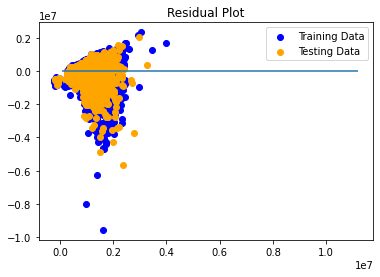

In [28]:
# Imports
%matplotlib inline
import matplotlib.pyplot as plt
# Plot the Residuals for the Training and Testing data
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [29]:
X_train_scaled = X_train.copy()
X_train_scaled.head()

,Rooms,Bathroom,Car,Landsize,Year,Month,Crime,Type_h,Type_t,Type_u
13010,0.416667,0.333333,0.111111,0.001499,0.2,0.727273,0.000323,1,0,0
2951,0.250000,0.222222,0.111111,0.000487,0.0,0.909091,0.055667,1,0,0
10067,0.166667,0.111111,0.333333,0.001977,0.2,0.363636,0.069487,1,0,0
8843,0.500000,0.333333,0.222222,0.001686,0.2,0.181818,0.017695,1,0,0
11787,0.250000,0.222222,0.111111,0.000741,0.2,0.545455,0.160220,1,0,0


In [30]:
X_test_scaled = X_test.copy()
X_test_scaled.head()

,Rooms,Bathroom,Car,Landsize,Year,Month,Crime,Type_h,Type_t,Type_u
14098,0.333333,0.222222,0.111111,0.001289,0.2,0.818182,0.069487,1,0,0
6320,0.250000,0.111111,0.111111,0.001561,0.2,0.090909,0.051275,1,0,0
16980,0.250000,0.111111,0.055556,0.001460,0.4,0.090909,0.190184,1,0,0
8560,0.416667,0.222222,0.111111,0.001411,0.2,0.000000,0.054181,1,0,0
14963,0.250000,0.222222,0.055556,0.001312,0.2,0.727273,0.011108,1,0,0


In [31]:
#fitting the model

model.fit(X_train_scaled, y_train)

LinearRegression()

In [32]:
# Scores

print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.2846985180985835
Testing Data Score: 0.3098093111035476


In [33]:
# checking predictions
predictions = model.predict(X_test_scaled)
predictions

array([[1350656.],
       [1044480.],
       [ 861184.],
       ...,
       [1456128.],
       [ 656896.],
       [1381376.]])

In [34]:
# getting presicitons out of array

final_prediction = []

x = 0

for i in predictions:
    
    value = round(predictions[x][0],0)
    final_prediction.append(value)
    
    x += 1

In [35]:
final_prediction

[1350656.0,
 1044480.0,
 861184.0,
 1551104.0,
 1286400.0,
 516352.0,
 519680.0,
 1910784.0,
 861696.0,
 990720.0,
 1174784.0,
 1352192.0,
 1359616.0,
 998912.0,
 1026816.0,
 1099776.0,
 877056.0,
 1295104.0,
 1200640.0,
 558592.0,
 936448.0,
 1296128.0,
 1292288.0,
 1182720.0,
 944640.0,
 1377536.0,
 1419264.0,
 1056000.0,
 634880.0,
 981248.0,
 1527808.0,
 1250304.0,
 468736.0,
 1265408.0,
 1289472.0,
 1318144.0,
 584192.0,
 967936.0,
 934144.0,
 720384.0,
 702208.0,
 973824.0,
 984576.0,
 1390336.0,
 2703872.0,
 571392.0,
 514304.0,
 1376256.0,
 1042432.0,
 909056.0,
 1375744.0,
 731648.0,
 1023232.0,
 1287424.0,
 1509376.0,
 895232.0,
 985088.0,
 852736.0,
 1077760.0,
 615168.0,
 877824.0,
 1492992.0,
 1143808.0,
 934144.0,
 957440.0,
 908544.0,
 1383680.0,
 1049344.0,
 1388544.0,
 1003264.0,
 1055744.0,
 1054208.0,
 946688.0,
 996352.0,
 1144832.0,
 1057280.0,
 890112.0,
 903936.0,
 442368.0,
 594176.0,
 740864.0,
 1014016.0,
 863232.0,
 924928.0,
 1019648.0,
 1078272.0,
 1121024.

In [36]:
# getting y values out of array
y_values = []

x = 0

for y in y_test:
    
    value = y_test[x][0]
    y_values.append(value)
    
    x += 1

In [37]:
y_values

[1507000.0,
 1230000.0,
 682500.0,
 1220000.0,
 1030000.0,
 845000.0,
 577000.0,
 1797000.0,
 1110000.0,
 1159000.0,
 730000.0,
 725000.0,
 980500.0,
 615000.0,
 710000.0,
 2110000.0,
 1035000.0,
 2055000.0,
 425000.0,
 385000.0,
 695000.0,
 825000.0,
 800000.0,
 726500.0,
 540000.0,
 538000.0,
 1540000.0,
 551000.0,
 1050000.0,
 1240000.0,
 1010000.0,
 1775000.0,
 436000.0,
 1800000.0,
 1015000.0,
 1750000.0,
 611000.0,
 468000.0,
 736500.0,
 503000.0,
 779000.0,
 705000.0,
 910000.0,
 2410000.0,
 3400000.0,
 590000.0,
 700000.0,
 2100000.0,
 1001000.0,
 735000.0,
 1500000.0,
 1200000.0,
 740000.0,
 725000.0,
 1815000.0,
 920000.0,
 1042000.0,
 380500.0,
 910500.0,
 665000.0,
 593000.0,
 2400000.0,
 1920000.0,
 886000.0,
 630000.0,
 1280000.0,
 1700000.0,
 1070000.0,
 1561000.0,
 1210000.0,
 840000.0,
 1110000.0,
 685500.0,
 1721000.0,
 965000.0,
 480000.0,
 1035000.0,
 870000.0,
 310000.0,
 841000.0,
 905000.0,
 1110000.0,
 850000.0,
 1010000.0,
 613000.0,
 975000.0,
 830000.0,
 5310

In [38]:
actual_vs_prediction_df = pd.DataFrame({'Actual': y_values,'Prediction': final_prediction})
actual_vs_prediction_df

,Actual,Prediction
0,1507000.0,1350656.0
1,1230000.0,1044480.0
2,682500.0,861184.0
3,1220000.0,1551104.0
4,1030000.0,1286400.0
...,...,...
4344,690000.0,546304.0
4345,990000.0,884480.0
4346,1920000.0,1456128.0
4347,420500.0,656896.0


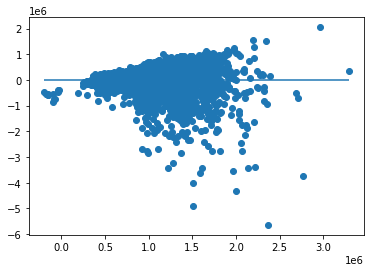

In [39]:
import matplotlib.pyplot as plt
# Plot Residuals
plt.scatter(predictions, predictions - y_test)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

# Saving model

In [40]:
import joblib
joblib_file = "LR_allXs.joblib"  
joblib.dump(model, joblib_file)

['LR_allXs.joblib']